# 데이터 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import re
from tqdm import tqdm
import pickle
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDERNAME = 'image_project5'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

# Change dariectory to current folder
%cd /content/drive/MyDrive/$FOLDERNAME

/content/drive/MyDrive/image_project5


In [ ]:
hrefs = []
pagenums = 119
baseurl = 'https://terms.naver.com/list.naver?cid=46702&categoryId=46739'
for page in range(1, pagenums+1):
    url = baseurl + f'&page={page}'
    resp = requests.get(url, headers = headers)
    soup = BeautifulSoup(resp.content, 'lxml')
    links = soup.select('a.thumb_link')
    for link in links:
        href = re.search(r'href="([^"]+)"', str(link)).group(1)
        hrefs.append(href)
    time.sleep(0.5)

In [ ]:
headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

In [ ]:
content_list = []
count = 0

for href in tqdm(hrefs):
    url = f'https://terms.naver.com/{href}'
    resp = requests.get(url, headers=headers)

    if (resp.status_code == 200) & ('categoryId=46739' in resp.url): # 그런 페이지가 존재한다면 진행
        html = resp.content
        soup = BeautifulSoup(html, 'lxml')

        content_dict = {}
        content_dict["id"] = doc_id

        # 텍스트 정보
        tmp_profile = soup.select('div.tmp_profile')
        if tmp_profile:
            for tr in tmp_profile[0].select('tr'):
                if '<br/>' in str(tr.select('td')[0]): # 만약 여러 카테고리의 정보가 있다면
                    beforethis = re.findall("<b>(.+?)</b>", str(tr.select('td')[0]))[0] # 굵은 글씨로 된 단어(카테고리명) 중 첫번째
                    content_dict[tr.select('th')[0].text] = re.findall(f"(.+?){beforethis}", tr.select('td')[0].text)[0] # .text 중에 그거 전까지만
                    for category, content in zip(re.findall("<b>(.+?)</b>", str(tr.select('td')[0])), re.findall("</b> (.+?)<", str(tr.select('td')[0]))):
                        content_dict[category] = content
                else:
                    content_dict[tr.select('th')[0].text] = tr.select('td')[0].text

            content_list.append(content_dict)

            # 이미지
            img_url = soup.select('div.img_area img')[0]['src']
            img_resp = requests.get(img_url)
            with open(f'/content/drive/MyDrive/image_project5/data_naver_image/img_{doc_id}.png', 'wb') as f:
                f.write(img_resp.content)

    else: # 그런 페이지가 존재하지 않는다면
        continue

    time.sleep(0.5)

    if len(content_list) == 100:
        with open(f"/content/drive/MyDrive/image_project5/content_{count}00", "wb") as fw:
            pickle.dump(content_list, fw)
        count += 1
        content_list = []

100%|██████████| 2001/2001 [1:53:51<00:00,  3.41s/it]


In [ ]:
content_list_cplt = []
for i in range(0, 20):
    with open(f'/content/drive/MyDrive/image_project5/content_{i}00', 'rb') as f:
        content_list_cplt += pickle.load(f)

In [ ]:
content_list_cplt

[{'id': '1569095',
  '제작연도': '19세기경',
  '기법': '지본채색',
  '크기': '각 57.4 x 30.7cm',
  '소장처': '쿠라시키 민예관'},
 {'id': '1551424',
  '아티스트': '김식(金埴)',
  '출생-사망': '1579년~1662년',
  '제작연도': '17세기 중엽경',
  '종류': '수묵채색화',
  '기법': '지본담채 (紙本淡彩)',
  '크기': '51.8 x 90.3 cm',
  '소장처': '국립중앙박물관'},
 {'id': '986489', '소장처': '국립고궁박물관'},
 {'id': '1552546',
  '아티스트': '김홍도(金弘道)',
  '국적': '조선',
  '출생-사망': '1745년~미상',
  '제작연도': '1781년',
  '종류': '한국화',
  '기법': '지본담채 (紙本淡彩)',
  '크기': '각각 122.7x47.9 cm',
  '소장처': '국립중앙박물관'},
 {'id': '1554035',
  '아티스트': '이중섭(Lee Jung-seop, 李仲燮)',
  '호': '대향',
  '국적': '대한민국',
  '출생-사망': '1916. 9. 16.~1956. 9. 6.',
  '종류': '한국화'},
 {'id': '1540266',
  '아티스트': '김호득',
  '국적': '대한민국',
  '출생': '1950년',
  '제작연도': '1993년',
  '종류': '수묵채색화',
  '기법': '한지에 수묵담채',
  '크기': '187 x 75 cm'},
 {'id': '1567767',
  '아티스트': '정선(鄭敾)',
  '출생-사망': '1676년~1759년',
  '기법': '견본담채',
  '크기': '31.4 x 24.2cm',
  '소장처': '간송미술관'},
 {'id': '975334',
  '아티스트': '홍세섭(洪世燮)',
  '호': '석창(石窓, Sǒkchang)',
  '출생-사망': '1832년 12월

## 추가 데이터 크롤링

In [ ]:
def linkscrawling(artist):
    baseurl, pagenums = artistdict[artist]
    hrefs = []
    for page in range(1, pagenums+1):
        url = baseurl + f'&page={page}'
        resp = requests.get(url, headers = headers)
        soup = BeautifulSoup(resp.content, 'lxml')
        links = soup.select('a.thumb_link')
        for link in links:
            href = re.search(r'href="([^"]+)"', str(link)).group(1)
            hrefs.append(href)
        time.sleep(0.5)
    return hrefs

artistdict = {'강연균' : ['https://terms.naver.com/artsSearch.naver?query=%EA%B0%95%EC%97%B0%EA%B7%A0+%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%88', 5],
           '이해민선' : ['https://terms.naver.com/artsSearch.naver?query=%EC%9D%B4%ED%95%B4%EB%AF%BC%EC%84%A0+%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%88', 1],
           '박수근' : ['https://terms.naver.com/artsSearch.naver?query=%EB%B0%95%EC%88%98%EA%B7%BC', 3],
           '김환기' : ['https://terms.naver.com/artsSearch.naver?query=%EA%B9%80%ED%99%98%EA%B8%B0', 2],
           '김명식' : ['https://terms.naver.com/artsSearch.naver?query=%EA%B9%80%EB%AA%85%EC%8B%9D+%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%88', 6],
           '박영인' : ['https://terms.naver.com/artsSearch.naver?query=%EB%B0%95%EC%98%81%EC%9D%B8+%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%88', 4],
            '유영국' : ['https://terms.naver.com/artsSearch.naver?query=%EC%9C%A0%EC%98%81%EA%B5%AD', 2],
            '황술조' : ['https://terms.naver.com/artsSearch.naver?query=%ED%99%A9%EC%88%A0%EC%A1%B0', 1],
            '이인성' : ['https://terms.naver.com/artsSearch.naver?query=%EC%9D%B4%EC%9D%B8%EC%84%B1', 1]}

hrefs = []
for artist in artistdict.keys() :
    hrefs = hrefs + linkscrawling(artist)

#이하 위와 동일하게 데이터 수집

# 작가 분류

## 데이터 전처리

In [ ]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.0'

In [ ]:
!pip install split-folders

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00


In [ ]:
import splitfolders
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
with open('/content/drive/MyDrive/image_project5/clean_content_list.pickle', 'rb') as f:
    content_list = pickle.load(f)

In [ ]:
a = content_list['아티스트'].value_counts()[content_list['아티스트'].value_counts() > 100]
content_list_artist = content_list[content_list['아티스트'].isin(a.index)]

In [ ]:
content_list_artist = content_list_artist.filter(items=['id', '아티스트'])
content_list_artist

,id,아티스트
0,975213,김홍도
4,1563794,김홍도
6,1552007,정선
8,975190,정선
10,1640498,이중섭
...,...,...
5616,1567021,이도영
5634,1565729,김준근
5638,1565821,김준근
5641,1567954,조석진


In [ ]:
img_filedir = "/content/drive/MyDrive/image_project5/data_naver_image"
content_list_artist['filepath'] = content_list_artist['id'].apply(lambda x : img_filedir + '/img_' + x + '.png')
content_list_artist

,id,아티스트,filepath
0,975213,김홍도,/content/drive/MyDrive/image_project5/data_nav...
4,1563794,김홍도,/content/drive/MyDrive/image_project5/data_nav...
6,1552007,정선,/content/drive/MyDrive/image_project5/data_nav...
8,975190,정선,/content/drive/MyDrive/image_project5/data_nav...
10,1640498,이중섭,/content/drive/MyDrive/image_project5/data_nav...
...,...,...,...
5616,1567021,이도영,/content/drive/MyDrive/image_project5/data_nav...
5634,1565729,김준근,/content/drive/MyDrive/image_project5/data_nav...
5638,1565821,김준근,/content/drive/MyDrive/image_project5/data_nav...
5641,1567954,조석진,/content/drive/MyDrive/image_project5/data_nav...


In [ ]:
widths_temp = []
lengths_temp = []
for img_path in content_list_artist['filepath']:
    img = cv2.imread(img_path)
    widths_temp.append(img.shape[0])
    lengths_temp.append(img.shape[1])

In [ ]:
widths_temp, lengths_temp = np.array(widths_temp), np.array(lengths_temp)

In [ ]:
count = 0
for w, l in zip(widths_temp, lengths_temp) :
    if (l * 2.42 < w) or (w * 2.42 < l) :
        count += 1
count

347

In [ ]:
display(np.mean(widths_temp), np.mean(lengths_temp))
display(np.max(widths_temp), np.max(lengths_temp))
display(np.min(widths_temp), np.min(lengths_temp))

1682.6845124282984

1443.2304015296368

2000

2000

133

251

In [ ]:
thres = 256
content_list_artist.iloc[np.concatenate((np.where(widths_temp < thres)[0], np.where(lengths_temp < thres)[0]))]

,id,아티스트,filepath
201,2028334,심사정,/content/drive/MyDrive/image_project5/data_nav...
1150,1564426,김규진,/content/drive/MyDrive/image_project5/data_nav...
1575,1566956,이도영,/content/drive/MyDrive/image_project5/data_nav...
261,1540186,이도영,/content/drive/MyDrive/image_project5/data_nav...
1139,1640597,이중섭,/content/drive/MyDrive/image_project5/data_nav...


In [ ]:
content_list_artist = content_list_artist.drop(index=content_list_artist.iloc[np.concatenate((np.where(widths_temp < thres)[0], np.where(lengths_temp < thres)[0]))].index)

In [ ]:
import imutils

In [ ]:
img_size = 224

In [ ]:
def rotate_and_resize_and_pad(img):
    # ROTATE
    if (img.shape[1] * 2.42 < img.shape[0]) or (img.shape[0] * 2.42 < img.shape[1]) :
        img = imutils.rotate_bound(img, 45)

    # RESIZE
    if(img.shape[1] > img.shape[0]) :
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]
    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA) # INTER_LANCZOS4

    # PAD
    w, h = img.shape[1], img.shape[0]
    dw, dh = (img_size-w)/2, (img_size-h)/2
    M = np.float32([[1,0,dw], [0,1,dh]])
    img_padded = cv2.warpAffine(img, M, (img_size, img_size))

    return img_padded

In [ ]:
label_names = content_list_artist['아티스트'].unique()

In [ ]:
label_names

array(['김홍도', '정선', '이중섭', '심사정', '강세황', '허련', '이도영', '김규진', '조석진', '김준근'],
      dtype=object)

In [ ]:
label2index = {}
for i, name in enumerate(label_names):
    label2index[name] = i
label2index

{'김홍도': 0,
 '정선': 1,
 '이중섭': 2,
 '심사정': 3,
 '강세황': 4,
 '허련': 5,
 '이도영': 6,
 '김규진': 7,
 '조석진': 8,
 '김준근': 9}

In [ ]:
os.mkdir('/content/resize')

In [ ]:
for label in label_names:
    dir_path = '/content/resize/'+ str(label2index[label])
    os.mkdir(dir_path)

In [ ]:
for img_path, label in tqdm(zip(content_list_artist['filepath'], content_list_artist['아티스트']), total=content_list_artist.shape[0]):
    img = cv2.imread(img_path)
    img_padded = rotate_and_resize_and_pad(img)
    filename = img_path.split('/')[-1]
    cv2.imwrite(f'/content/resize/{label2index[label]}/{filename}', img_padded)

100%|██████████| 2087/2087 [12:13<00:00,  2.84it/s]


In [ ]:
splitfolders.ratio('/content/resize', output='dataset_224_rotate', seed=77, ratio=(0.8, 0.1, 0.1))

Copying files: 2087 files [00:23, 88.22 files/s] 


In [ ]:
folder_path = "/content/drive/MyDrive/image_project5/dataset_224_rotate"
for t in ['train', 'val', 'test']:
    for label in label_names:
        print(t, label, len(os.listdir(folder_path + '/' + t + '/' + str(label2index[label]))))

train 김홍도 355
train 정선 193
train 이중섭 262
train 심사정 112
train 강세황 122
train 허련 134
train 이도영 80
train 김규진 130
train 조석진 80
train 김준근 196
val 김홍도 44
val 정선 24
val 이중섭 32
val 심사정 14
val 강세황 15
val 허련 16
val 이도영 10
val 김규진 16
val 조석진 10
val 김준근 24
test 김홍도 45
test 정선 25
test 이중섭 34
test 심사정 15
test 강세황 16
test 허련 18
test 이도영 11
test 김규진 17
test 조석진 11
test 김준근 26


In [ ]:
# 이미지 데이터가 있는 폴더 경로 설정
dataset_name = 'dataset_224_rotate'

train_folder_path = "/content/drive/MyDrive/image_project5/" + dataset_name + "/train"
val_folder_path = "/content/drive/MyDrive/image_project5/" + dataset_name + "/val"
test_folder_path = "/content/drive/MyDrive/image_project5/" + dataset_name + "/test"

### mean img for zero-centering

In [ ]:
train_dirdict = {}
for label in label_names:
    filenames = os.listdir(train_folder_path + "/" + str(label2index[label]))
    filenames = list(map(lambda filename : train_folder_path + "/" + str(label2index[label]) + "/" + filename, filenames))
    train_dirdict[label2index[label]] = filenames

In [ ]:
x_train = []
for label in label_names:
    for img_path in train_dirdict[label2index[label]]:
        img = cv2.imread(img_path)
        x_train.append(img)

In [ ]:
len(x_train)

2434

In [ ]:
compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
mean_img = compute_mean(x_train)

In [ ]:
mean_img.shape

(224, 224, 3)

In [ ]:
with open("/content/drive/MyDrive/image_project5/mean_img_artist10_224_rotate.pickle", "wb") as fw:
    pickle.dump(mean_img, fw)

In [ ]:
x_train = np.array(x_train)

In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)

In [ ]:
x_train_gray.shape

TensorShape([1664, 224, 224, 1])

In [ ]:
mean_img_gray = compute_mean(x_train_gray)

In [ ]:
mean_img_gray.shape

(224, 224, 1)

In [ ]:
with open("/content/drive/MyDrive/image_project5/mean_img_artist10_224_rotate_gray.pickle", "wb") as fw:
    pickle.dump(mean_img_gray, fw)

In [ ]:
# mean img 불러오기(rgb와 grayscale 2개)
with open('/content/drive/MyDrive/image_project5/mean_img_artist10_224_rotate.pickle', 'rb') as f:
    mean_img = pickle.load(f)
with open('/content/drive/MyDrive/image_project5/mean_img_artist10_224_rotate_gray.pickle', 'rb') as f:
    mean_img_gray = pickle.load(f)

In [ ]:
batch_size = 128

In [ ]:
train_dataset = image_dataset_from_directory(train_folder_path,
                                            batch_size=batch_size,
                                            image_size=(img_size, img_size),
                                            shuffle=True,
                                            seed=39,
                                            interpolation='lanczos3')

val_dataset = image_dataset_from_directory(val_folder_path,
                                            batch_size=batch_size,
                                            image_size=(img_size, img_size),
                                            shuffle=True,
                                            seed=39,
                                            interpolation='lanczos3')

test_dataset = image_dataset_from_directory(test_folder_path,
                                            batch_size=batch_size,
                                            image_size=(img_size, img_size),
                                            shuffle=True,
                                            seed=39,
                                            interpolation='lanczos3')

Found 1664 files belonging to 10 classes.
Found 205 files belonging to 10 classes.
Found 218 files belonging to 10 classes.


## 모델링

In [ ]:
num_classes = 10

### Model Base

In [ ]:
enb4 = tf.keras.applications.EfficientNetB4(include_top=False,
                                            weights="imagenet",
                                            input_shape=None,
                                            pooling=None)

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
enb4.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))
x = sub_mean_img(inputs, mean_img)
x = enb4(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# callbacks
es = early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es])

Epoch 1/30
13/13 [==============================] - 663s 51s/step - loss: 1.4137 - accuracy: 0.5132 - val_loss: 1.3471 - val_accuracy: 0.5659
Epoch 2/30
13/13 [==============================] - 678s 52s/step - loss: 1.2243 - accuracy: 0.5950 - val_loss: 1.2810 - val_accuracy: 0.5610
Epoch 3/30
13/13 [==============================] - 693s 53s/step - loss: 1.1395 - accuracy: 0.6100 - val_loss: 1.2413 - val_accuracy: 0.6098
Epoch 4/30


KeyboardInterrupt: ignored

### Model v2 (380)

In [ ]:
img_size = 380

In [ ]:
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))
x = sub_mean_img(inputs, mean_img)
x = enb4(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 tf.math.subtract (TFOpLambd  (None, 380, 380, 3)      0         
 a)                                                              
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# callbacks
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ck = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es, ck])

Epoch 1/30
13/13 [==============================] - 1655s 108s/step - loss: 1.8065 - accuracy: 0.3882 - val_loss: 1.4028 - val_accuracy: 0.5122
Epoch 2/30
13/13 [==============================] - 1416s 108s/step - loss: 1.3560 - accuracy: 0.5451 - val_loss: 1.2678 - val_accuracy: 0.5756
Epoch 3/30
13/13 [==============================] - 1399s 108s/step - loss: 1.2292 - accuracy: 0.5853 - val_loss: 1.1710 - val_accuracy: 0.6146
Epoch 4/30
13/13 [==============================] - 1404s 108s/step - loss: 1.1252 - accuracy: 0.6352 - val_loss: 1.1459 - val_accuracy: 0.6244
Epoch 5/30
13/13 [==============================] - 1408s 108s/step - loss: 1.0366 - accuracy: 0.6587 - val_loss: 1.0939 - val_accuracy: 0.6341
Epoch 6/30
13/13 [==============================] - 1397s 107s/step - loss: 0.9773 - accuracy: 0.6779 - val_loss: 1.0734 - val_accuracy: 0.6390
Epoch 7/30
13/13 [==============================] - 1329s 102s/step - loss: 0.9165 - accuracy: 0.6929 - val_loss: 1.0652 - val_accuracy:

### Model v3 (grayscale)

In [ ]:
enb0_1 = tf.keras.applications.EfficientNetB0(include_top=False,
                                            weights="imagenet",
                                            input_shape=None,
                                            pooling=None)

enb0_2 = tf.keras.applications.EfficientNetB0(include_top=False,
                                            weights="imagenet",
                                            input_shape=None,
                                            pooling=None)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# 분류층만 학습시
enb0_1.trainable = False
enb0_2.trainable = False

In [ ]:
enb0_1._name = "efficientnetb0_1"
enb0_2._name = "efficientnetb0_2"

In [ ]:
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))

x_rgb = sub_mean_img(inputs, mean_img)
x_rgb = enb0_1(x_rgb, training=False)
x_rgb = tf.keras.layers.GlobalAveragePooling2D()(x_rgb)

x_gray = tf.image.rgb_to_grayscale(inputs)
x_gray = sub_mean_img(x_gray, mean_img_gray)
x_gray = tf.repeat(x_gray, 3, axis=3)
x_gray = enb0_2(x_gray, training=False)
x_gray = tf.keras.layers.GlobalAveragePooling2D()(x_gray)

x = tf.keras.layers.Concatenate(axis=-1)([x_rgb, x_gray])

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.rgb_to_grayscale_1 (T  (None, 224, 224, 1)  0          ['input_4[0][0]']                
 FOpLambda)                                                                                       
                                                                                                  
 tf.math.subtract_3 (TFOpLambda  (None, 224, 224, 1)  0          ['tf.image.rgb_to_grayscale_1[0][
 )                                                               0]']                       

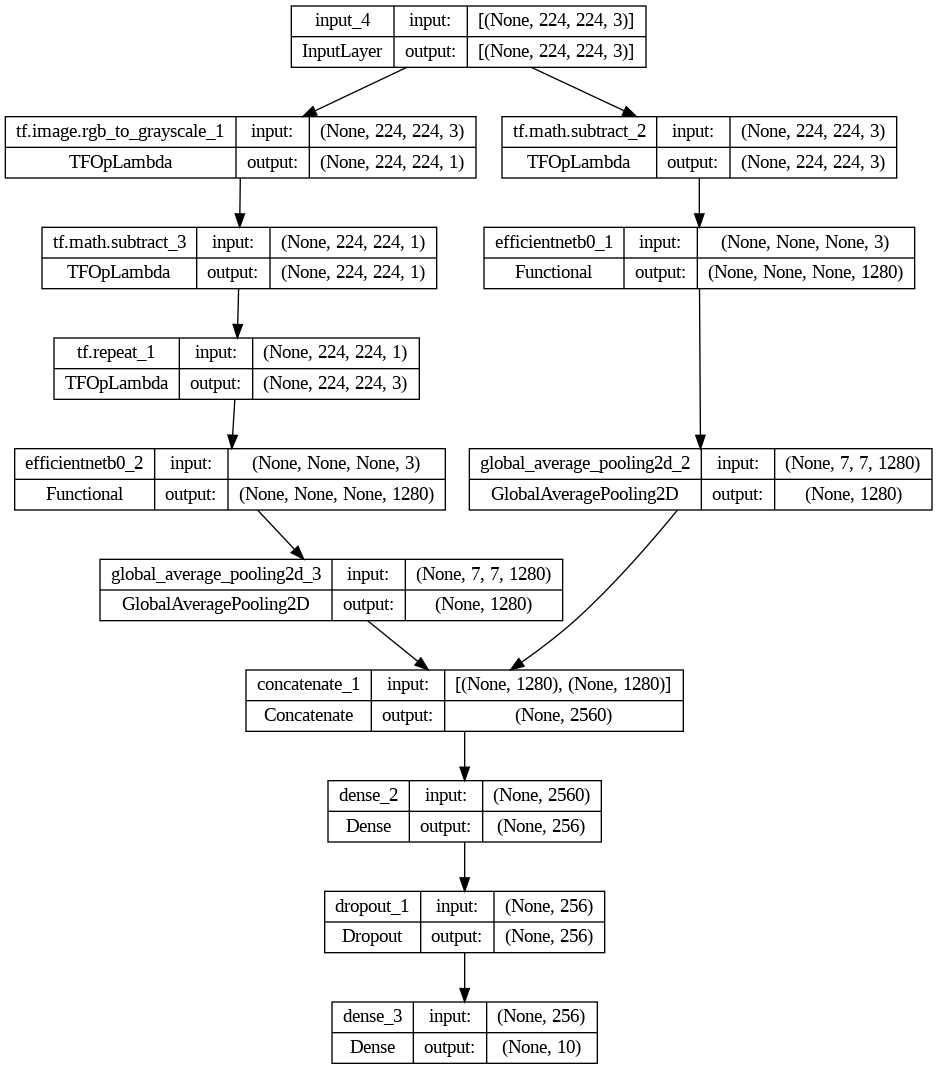

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# tf.keras.optimizers.AdamW(learning_rate=0.0001)

In [ ]:
# callbacks
ck_path = "/content/drive/MyDrive/image_project5/model_224_gray_onlytop"

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es])

Epoch 1/30
13/13 [==============================] - 187s 14s/step - loss: 1.1094 - accuracy: 0.6238 - val_loss: 1.0052 - val_accuracy: 0.6732
Epoch 2/30
13/13 [==============================] - 193s 14s/step - loss: 0.9070 - accuracy: 0.6911 - val_loss: 0.9691 - val_accuracy: 0.6780
Epoch 3/30
13/13 [==============================] - 189s 14s/step - loss: 0.7756 - accuracy: 0.7404 - val_loss: 0.9214 - val_accuracy: 0.6927
Epoch 4/30
13/13 [==============================] - 183s 14s/step - loss: 0.6858 - accuracy: 0.7728 - val_loss: 0.8611 - val_accuracy: 0.7024
Epoch 5/30
13/13 [==============================] - 191s 15s/step - loss: 0.6244 - accuracy: 0.7897 - val_loss: 0.8842 - val_accuracy: 0.6927
Epoch 6/30
13/13 [==============================] - 184s 14s/step - loss: 0.5573 - accuracy: 0.8053 - val_loss: 0.8595 - val_accuracy: 0.7073
Epoch 7/30
13/13 [==============================] - 183s 14s/step - loss: 0.5013 - accuracy: 0.8305 - val_loss: 0.8528 - val_accuracy: 0.7024
Epoch 

### Model v3-1 (rotate)

In [ ]:
# 재사용할 레이어
dense = tf.keras.layers.Dense(256, activation='relu')

# 연결
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))

x_rgb = sub_mean_img(inputs, mean_img)
x_rgb = enb0_1(x_rgb, training=False)
x_rgb = tf.keras.layers.GlobalAveragePooling2D()(x_rgb)

x_gray = tf.image.rgb_to_grayscale(inputs)
x_gray = sub_mean_img(x_gray, mean_img_gray)
x_gray = tf.repeat(x_gray, 3, axis=3)
x_gray = enb0_2(x_gray, training=False)
x_gray = tf.keras.layers.GlobalAveragePooling2D()(x_gray)

x = tf.keras.layers.Concatenate(axis=-1)([x_rgb, x_gray]) # (, 2560)

x = dense(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.rgb_to_grayscale (TFO  (None, 224, 224, 1)  0          ['input_3[0][0]']                
 pLambda)                                                                                         
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 224, 224, 1)  0          ['tf.image.rgb_to_grayscale[0][0]
 )                                                               ']                           

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# tf.keras.optimizers.AdamW(learning_rate=0.0001)

In [ ]:
ck_path = "/content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop"

In [ ]:
# callbacks
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es, ck])

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 1.6198 - accuracy: 0.4483 
Epoch 1: val_loss improved from inf to 1.11127, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 645s 43s/step - loss: 1.6198 - accuracy: 0.4483 - val_loss: 1.1113 - val_accuracy: 0.6293
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 1.0639 - accuracy: 0.6454 
Epoch 2: val_loss improved from 1.11127 to 0.96358, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 511s 40s/step - loss: 1.0639 - accuracy: 0.6454 - val_loss: 0.9636 - val_accuracy: 0.7024
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.8675 - accuracy: 0.7157 
Epoch 3: val_loss improved from 0.96358 to 0.89348, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 513s 40s/step - loss: 0.8675 - accuracy: 0.7157 - val_loss: 0.8935 - val_accuracy: 0.7024
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 0.7572 - accuracy: 0.7566 
Epoch 4: val_loss improved from 0.89348 to 0.88597, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 512s 40s/step - loss: 0.7572 - accuracy: 0.7566 - val_loss: 0.8860 - val_accuracy: 0.6927
Epoch 5/30
13/13 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.7957 
Epoch 5: val_loss improved from 0.88597 to 0.87357, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 510s 40s/step - loss: 0.6559 - accuracy: 0.7957 - val_loss: 0.8736 - val_accuracy: 0.6732
Epoch 6/30
13/13 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.8095 
Epoch 6: val_loss improved from 0.87357 to 0.82028, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 504s 39s/step - loss: 0.5791 - accuracy: 0.8095 - val_loss: 0.8203 - val_accuracy: 0.7171
Epoch 7/30
13/13 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.8311 
Epoch 7: val_loss did not improve from 0.82028
13/13 [==============================] - 368s 28s/step - loss: 0.5243 - accuracy: 0.8311 - val_loss: 0.8428 - val_accuracy: 0.6927
Epoch 8/30
13/13 [==============================] - ETA: 0s - loss: 0.4768 - accuracy: 0.8431 
Epoch 8: val_loss improved from 0.82028 to 0.81365, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 503s 39s/step - loss: 0.4768 - accuracy: 0.8431 - val_loss: 0.8136 - val_accuracy: 0.7366
Epoch 9/30
13/13 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.8642 
Epoch 9: val_loss improved from 0.81365 to 0.80241, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 515s 40s/step - loss: 0.4266 - accuracy: 0.8642 - val_loss: 0.8024 - val_accuracy: 0.7220
Epoch 10/30
13/13 [==============================] - ETA: 0s - loss: 0.3652 - accuracy: 0.8918 
Epoch 10: val_loss did not improve from 0.80241
13/13 [==============================] - 376s 29s/step - loss: 0.3652 - accuracy: 0.8918 - val_loss: 0.8048 - val_accuracy: 0.7463
Epoch 11/30
13/13 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.8972 
Epoch 11: val_loss did not improve from 0.80241
13/13 [==============================] - 363s 28s/step - loss: 0.3369 - accuracy: 0.8972 - val_loss: 0.8076 - val_accuracy: 0.7366
Epoch 12/30
13/13 [==============================] - ETA: 0s - loss: 0.2956 - accuracy: 0.9159 
Epoch 12: val_loss improved from 0.80241 to 0.78731, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_onlytop


13/13 [==============================] - 507s 39s/step - loss: 0.2956 - accuracy: 0.9159 - val_loss: 0.7873 - val_accuracy: 0.7415
Epoch 13/30
13/13 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.9255 
Epoch 13: val_loss did not improve from 0.78731
13/13 [==============================] - 393s 30s/step - loss: 0.2785 - accuracy: 0.9255 - val_loss: 0.8281 - val_accuracy: 0.7415
Epoch 14/30
13/13 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.9213 
Epoch 14: val_loss did not improve from 0.78731
13/13 [==============================] - 379s 29s/step - loss: 0.2550 - accuracy: 0.9213 - val_loss: 0.8049 - val_accuracy: 0.7317
Epoch 15/30
13/13 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9339 
Epoch 15: val_loss did not improve from 0.78731
13/13 [==============================] - 369s 28s/step - loss: 0.2303 - accuracy: 0.9339 - val_loss: 0.8192 - val_accuracy: 0.7512


In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 70s 18s/step - loss: 0.8113 - accuracy: 0.7477


[0.8112903833389282, 0.747706413269043]

In [ ]:
model.save('onlytop_224_gray_rotate.h5')

#### weight 분석

In [ ]:
# 가중치가 궁금해!
model.layers[-3].weights[0]

<tf.Variable 'dense/kernel:0' shape=(2560, 256) dtype=float32, numpy=
array([[ 0.07156852, -0.03157999, -0.04453579, ..., -0.04116936,
        -0.03833011,  0.01831792],
       [-0.04456794,  0.03809297, -0.00818349, ...,  0.01902401,
        -0.06337171,  0.03854128],
       [-0.0290515 , -0.04857183,  0.03408738, ..., -0.02457223,
         0.05012218,  0.01047699],
       ...,
       [ 0.01597495, -0.01269312, -0.01621192, ..., -0.03728384,
         0.04636375,  0.03139869],
       [ 0.01112811,  0.00258165,  0.03291547, ..., -0.01400975,
        -0.00537098,  0.03849227],
       [-0.01101015,  0.02926475, -0.00562211, ...,  0.04821745,
        -0.02985431,  0.01686251]], dtype=float32)>

In [ ]:
rgb_weights = model.layers[-3].weights[0][:1280]
gray_weights = model.layers[-3].weights[0][1280:]

In [ ]:
rgb_weights_np = np.array(rgb_weights)
gray_weights_np = np.array(gray_weights)

In [ ]:
rgb_weights_abs.sum(), gray_weights_abs.sum()

(8266.297, 8243.102)

In [ ]:
np.mean(rgb_weights_abs), np.mean(gray_weights_abs)

(0.025226736, 0.02515595)

### Model v4 (augmentation)

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomBrightness(0.2, seed=39),
        tf.keras.layers.RandomContrast(0.8, seed=39),
    ]
)

In [ ]:
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

In [ ]:
# 재사용할 레이어
dense = tf.keras.layers.Dense(256, activation='relu')

# 연결
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))

x_rgb = sub_mean_img(inputs, mean_img)
x_rgb = enb0_1(x_rgb, training=False)
x_rgb = tf.keras.layers.GlobalAveragePooling2D()(x_rgb)

x_gray = tf.image.rgb_to_grayscale(inputs)
x_gray = sub_mean_img(x_gray, mean_img_gray)
x_gray = tf.repeat(x_gray, 3, axis=3)
x_gray = enb0_2(x_gray, training=False)
x_gray = tf.keras.layers.GlobalAveragePooling2D()(x_gray)

x = tf.keras.layers.Concatenate(axis=-1)([x_rgb, x_gray])

x = dense(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.rgb_to_grayscale (TFO  (None, 224, 224, 1)  0          ['input_3[0][0]']                
 pLambda)                                                                                         
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 224, 224, 1)  0          ['tf.image.rgb_to_grayscale[0][0]
 )                                                               ']                           

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# callbacks
ck_path = "/content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop"

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es, ck])

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 1.7715 - accuracy: 0.3858 
Epoch 1: val_loss improved from inf to 1.27013, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 717s 46s/step - loss: 1.7715 - accuracy: 0.3858 - val_loss: 1.2701 - val_accuracy: 0.5366
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 1.3343 - accuracy: 0.5421 
Epoch 2: val_loss improved from 1.27013 to 1.07276, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 531s 41s/step - loss: 1.3343 - accuracy: 0.5421 - val_loss: 1.0728 - val_accuracy: 0.6341
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 1.1599 - accuracy: 0.6094 
Epoch 3: val_loss improved from 1.07276 to 1.00438, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 542s 42s/step - loss: 1.1599 - accuracy: 0.6094 - val_loss: 1.0044 - val_accuracy: 0.6585
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 1.0862 - accuracy: 0.6418 
Epoch 4: val_loss improved from 1.00438 to 0.96481, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 532s 42s/step - loss: 1.0862 - accuracy: 0.6418 - val_loss: 0.9648 - val_accuracy: 0.6634
Epoch 5/30
13/13 [==============================] - ETA: 0s - loss: 1.0226 - accuracy: 0.6617 
Epoch 5: val_loss improved from 0.96481 to 0.90522, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 533s 42s/step - loss: 1.0226 - accuracy: 0.6617 - val_loss: 0.9052 - val_accuracy: 0.6927
Epoch 6/30
13/13 [==============================] - ETA: 0s - loss: 0.9874 - accuracy: 0.6665 
Epoch 6: val_loss did not improve from 0.90522
13/13 [==============================] - 397s 30s/step - loss: 0.9874 - accuracy: 0.6665 - val_loss: 0.9203 - val_accuracy: 0.6829
Epoch 7/30
13/13 [==============================] - ETA: 0s - loss: 0.9207 - accuracy: 0.6749 
Epoch 7: val_loss improved from 0.90522 to 0.88612, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 519s 41s/step - loss: 0.9207 - accuracy: 0.6749 - val_loss: 0.8861 - val_accuracy: 0.7024
Epoch 8/30
13/13 [==============================] - ETA: 0s - loss: 0.9029 - accuracy: 0.6923 
Epoch 8: val_loss improved from 0.88612 to 0.87875, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 525s 41s/step - loss: 0.9029 - accuracy: 0.6923 - val_loss: 0.8787 - val_accuracy: 0.6878
Epoch 9/30
13/13 [==============================] - ETA: 0s - loss: 0.8581 - accuracy: 0.7103 
Epoch 9: val_loss improved from 0.87875 to 0.83296, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 527s 41s/step - loss: 0.8581 - accuracy: 0.7103 - val_loss: 0.8330 - val_accuracy: 0.6927
Epoch 10/30
13/13 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.6959 
Epoch 10: val_loss did not improve from 0.83296
13/13 [==============================] - 376s 29s/step - loss: 0.8612 - accuracy: 0.6959 - val_loss: 0.8455 - val_accuracy: 0.6976
Epoch 11/30
13/13 [==============================] - ETA: 0s - loss: 0.8157 - accuracy: 0.7260 
Epoch 11: val_loss improved from 0.83296 to 0.81804, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 515s 40s/step - loss: 0.8157 - accuracy: 0.7260 - val_loss: 0.8180 - val_accuracy: 0.7122
Epoch 12/30
13/13 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.7362 
Epoch 12: val_loss did not improve from 0.81804
13/13 [==============================] - 374s 28s/step - loss: 0.7679 - accuracy: 0.7362 - val_loss: 0.8345 - val_accuracy: 0.7024
Epoch 13/30
13/13 [==============================] - ETA: 0s - loss: 0.7740 - accuracy: 0.7326 
Epoch 13: val_loss improved from 0.81804 to 0.77297, saving model to /content/drive/MyDrive/image_project5/model_224_gray_rotate_aug_onlytop


13/13 [==============================] - 540s 42s/step - loss: 0.7740 - accuracy: 0.7326 - val_loss: 0.7730 - val_accuracy: 0.7024
Epoch 14/30
13/13 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.7518 
Epoch 14: val_loss did not improve from 0.77297
13/13 [==============================] - 384s 29s/step - loss: 0.7274 - accuracy: 0.7518 - val_loss: 0.7819 - val_accuracy: 0.7122
Epoch 15/30
13/13 [==============================] - ETA: 0s - loss: 0.7167 - accuracy: 0.7554 
Epoch 15: val_loss did not improve from 0.77297
13/13 [==============================] - 385s 29s/step - loss: 0.7167 - accuracy: 0.7554 - val_loss: 0.8202 - val_accuracy: 0.7268
Epoch 16/30
13/13 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7734 
Epoch 16: val_loss did not improve from 0.77297
13/13 [==============================] - 384s 29s/step - loss: 0.6711 - accuracy: 0.7734 - val_loss: 0.8031 - val_accuracy: 0.7122


In [ ]:
model.save('model_224_gray_rotate_aug_onlytop.h5')

In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 62s 16s/step - loss: 0.8888 - accuracy: 0.7110


[0.8888077139854431, 0.71100914478302]

### Model v5 (dropout 0.7)

In [ ]:
# 재사용할 레이어
dense = tf.keras.layers.Dense(512, activation='relu')

# 연결
inputs = tf.keras.Input(shape=(img_size, img_size, 3,))

x_rgb = sub_mean_img(inputs, mean_img)
x_rgb = enb0_1(x_rgb, training=False)
x_rgb = tf.keras.layers.GlobalAveragePooling2D()(x_rgb)

x_gray = tf.image.rgb_to_grayscale(inputs)
x_gray = sub_mean_img(x_gray, mean_img_gray)
x_gray = tf.repeat(x_gray, 3, axis=3)
x_gray = enb0_2(x_gray, training=False)
x_gray = tf.keras.layers.GlobalAveragePooling2D()(x_gray)

x = tf.keras.layers.Concatenate(axis=-1)([x_rgb, x_gray]) # (, 2560)

x = dense(x)
x = tf.keras.layers.Dropout(0.7)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.rgb_to_grayscale_2 (T  (None, 224, 224, 1)  0          ['input_5[0][0]']                
 FOpLambda)                                                                                       
                                                                                                  
 tf.math.subtract_5 (TFOpLambda  (None, 224, 224, 1)  0          ['tf.image.rgb_to_grayscale_2[0][
 )                                                               0]']                       

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# callbacks
ck_path = "/content/drive/MyDrive/image_project5/model_224_gray_rotate_dropout07_onlytop"

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_dataset, batch_size=batch_size, validation_data=val_dataset, epochs=30,
                    callbacks=[es, ck])

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 1.7398 - accuracy: 0.4183 
Epoch 1: val_loss improved from inf to 1.12713, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 495s 37s/step - loss: 1.7398 - accuracy: 0.4183 - val_loss: 1.1271 - val_accuracy: 0.5659
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 1.1679 - accuracy: 0.6100 
Epoch 2: val_loss improved from 1.12713 to 1.05022, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 460s 36s/step - loss: 1.1679 - accuracy: 0.6100 - val_loss: 1.0502 - val_accuracy: 0.6000
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 1.0042 - accuracy: 0.6767 
Epoch 3: val_loss improved from 1.05022 to 0.93689, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 450s 35s/step - loss: 1.0042 - accuracy: 0.6767 - val_loss: 0.9369 - val_accuracy: 0.6927
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 0.8477 - accuracy: 0.7175 
Epoch 4: val_loss improved from 0.93689 to 0.89141, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 446s 35s/step - loss: 0.8477 - accuracy: 0.7175 - val_loss: 0.8914 - val_accuracy: 0.6780
Epoch 5/30
13/13 [==============================] - ETA: 0s - loss: 0.7807 - accuracy: 0.7404 
Epoch 5: val_loss did not improve from 0.89141
13/13 [==============================] - 325s 25s/step - loss: 0.7807 - accuracy: 0.7404 - val_loss: 0.8917 - val_accuracy: 0.6829
Epoch 6/30
13/13 [==============================] - ETA: 0s - loss: 0.7169 - accuracy: 0.7692 
Epoch 6: val_loss improved from 0.89141 to 0.86462, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 450s 35s/step - loss: 0.7169 - accuracy: 0.7692 - val_loss: 0.8646 - val_accuracy: 0.7171
Epoch 7/30
13/13 [==============================] - ETA: 0s - loss: 0.6526 - accuracy: 0.7794 
Epoch 7: val_loss improved from 0.86462 to 0.81266, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 458s 36s/step - loss: 0.6526 - accuracy: 0.7794 - val_loss: 0.8127 - val_accuracy: 0.6976
Epoch 8/30
13/13 [==============================] - ETA: 0s - loss: 0.5838 - accuracy: 0.8089 
Epoch 8: val_loss did not improve from 0.81266
13/13 [==============================] - 323s 25s/step - loss: 0.5838 - accuracy: 0.8089 - val_loss: 0.8181 - val_accuracy: 0.7024
Epoch 9/30
13/13 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.8239 
Epoch 9: val_loss improved from 0.81266 to 0.79612, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 448s 35s/step - loss: 0.5369 - accuracy: 0.8239 - val_loss: 0.7961 - val_accuracy: 0.7171
Epoch 10/30
13/13 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.8257 
Epoch 10: val_loss did not improve from 0.79612
13/13 [==============================] - 354s 27s/step - loss: 0.5087 - accuracy: 0.8257 - val_loss: 0.8097 - val_accuracy: 0.7171
Epoch 11/30
13/13 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.8450 
Epoch 11: val_loss did not improve from 0.79612
13/13 [==============================] - 326s 25s/step - loss: 0.4628 - accuracy: 0.8450 - val_loss: 0.8040 - val_accuracy: 0.7171
Epoch 12/30
13/13 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.8546 
Epoch 12: val_loss improved from 0.79612 to 0.79486, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 481s 37s/step - loss: 0.4338 - accuracy: 0.8546 - val_loss: 0.7949 - val_accuracy: 0.7268
Epoch 13/30
13/13 [==============================] - ETA: 0s - loss: 0.4002 - accuracy: 0.8684 
Epoch 13: val_loss did not improve from 0.79486
13/13 [==============================] - 359s 27s/step - loss: 0.4002 - accuracy: 0.8684 - val_loss: 0.8121 - val_accuracy: 0.7122
Epoch 14/30
13/13 [==============================] - ETA: 0s - loss: 0.3696 - accuracy: 0.8798 
Epoch 14: val_loss did not improve from 0.79486
13/13 [==============================] - 346s 26s/step - loss: 0.3696 - accuracy: 0.8798 - val_loss: 0.8277 - val_accuracy: 0.7268
Epoch 15/30
13/13 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.8810 
Epoch 15: val_loss improved from 0.79486 to 0.79420, saving model to /content/drive/MyDrive/backup/model


13/13 [==============================] - 453s 35s/step - loss: 0.3587 - accuracy: 0.8810 - val_loss: 0.7942 - val_accuracy: 0.7317
Epoch 16/30
13/13 [==============================] - ETA: 0s - loss: 0.3252 - accuracy: 0.8930 
Epoch 16: val_loss did not improve from 0.79420
13/13 [==============================] - 326s 25s/step - loss: 0.3252 - accuracy: 0.8930 - val_loss: 0.8498 - val_accuracy: 0.7463
Epoch 17/30
13/13 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.8972 
Epoch 17: val_loss did not improve from 0.79420
13/13 [==============================] - 320s 24s/step - loss: 0.2959 - accuracy: 0.8972 - val_loss: 0.8342 - val_accuracy: 0.7317
Epoch 18/30
13/13 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9129 
Epoch 18: val_loss did not improve from 0.79420
13/13 [==============================] - 329s 25s/step - loss: 0.2867 - accuracy: 0.9129 - val_loss: 0.8277 - val_accuracy: 0.7512


In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 37s 15s/step - loss: 0.7903 - accuracy: 0.7661


[0.7903435230255127, 0.7660550475120544]

In [ ]:
model.save('model_224_gray_rotate_dropout07_onlytop.h5')

# 기법 분류

## EDA & 라벨 선정

In [ ]:
with open('/content/drive/MyDrive/4조 이미지/plus_content.pickle', 'rb') as f:
    data = pickle.load(f)

data = pd.DataFrame(data)
data

,id,아티스트,국적,출생,제작연도,기법,크기,종류,출생-사망,소장처,필명
0,1562562,"강연균(Kang Yeon-gyun, 姜連均)",대한민국,1941. 11. 23,1985년,종이에 오일파스텔,54.8 x 39.8 cm,NaN,NaN,NaN,NaN
1,1561896,"강연균(Kang Yeon-gyun, 姜連均)",대한민국,1941. 11. 23,1978년,연필(Pencil),23 x 22 cm,소묘,NaN,NaN,NaN
2,1561897,"강연균(Kang Yeon-gyun, 姜連均)",대한민국,1941. 11. 23,1986년,"종이에 콘테, 수채",37.5 x 52.5 cm,NaN,NaN,NaN,NaN
3,1561898,"강연균(Kang Yeon-gyun, 姜連均)",대한민국,1941. 11. 23,1983년,"종이에 콘테, 수채",57 x 71 cm,NaN,NaN,NaN,NaN
4,1561899,"강연균(Kang Yeon-gyun, 姜連均)",대한민국,1941. 11. 23,1982년,"종이에 콘테, 수채",55.7 x 37.5 cm,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
723,1567328,이인성(李仁星),NaN,NaN,1930년경,종이에 수채(Watercolor on Paper),76 x 59cm,NaN,1912년 8월 28일~1950년 11월 4일,개인,NaN
724,1567329,이인성(李仁星),NaN,NaN,1944년,캔버스에 유채,228.5 x 146cm,NaN,1912년 8월 28일~1950년 11월 4일,NaN,NaN
725,1569145,이인성(李仁星),NaN,NaN,1940년,종이에 수채(Watercolor on Paper),40.5 x 51cm,NaN,1912년 8월 28일~1950년 11월 4일,개인,NaN
726,1569146,이인성(李仁星),NaN,NaN,1940년,종이에 수묵담채,26 x 23cm,NaN,1912년 8월 28일~1950년 11월 4일,개인,NaN


In [ ]:
data['기법'].value_counts()

지본담채         1098
지본수묵          794
견본채색          655
견본담채          556
지본채색          520
             ... 
종이에연필과슈         1
천위에             1
비단에채색나무조짝       1
은지수묵            1
비단수묵담채          1
Name: 기법, Length: 265, dtype: int64

In [ ]:
data.isnull().sum()

In [ ]:
def remove_non_korean(word):
    if pd.isna(word):
        return word
    else:
        return re.sub('[^가-힣]', '', word)
data['기법'] = data['기법'].apply(remove_non_korean)
data['아티스트'] = data['아티스트'].apply(remove_non_korean)

In [ ]:
def replaceword(preword, result):
    try:
        if result in preword :
            return result
        else :
            return preword
    except TypeError:
        return preword

data['기법'] = data['기법'].apply(lambda x: replaceword(x, '수채'))
data['기법'] = data['기법'].apply(lambda x: replaceword(x, '유채'))

combineword = {'종이에수묵' : '지본수묵',
               '종이에수묵담채' : '지본담채',
               '종이에수묵채색' : '지본채색',
               '비단에채색' : '견본채색',
               '비단에수묵담채' : '견본담채',
               '비단에수묵' : '견본수묵',
               '종이에먹' : '지본수묵',
               '종이에담채' : '지본담채',
               '지본수묵담채' : '지본담채',
               '비단에수묵채색' : '견본채색',
               '한지위에채색' : '한지에수묵채색',
               '비단에먹' : '견본수묵',
               '종이에채색' : '지본채색',
               '지본수묵채색' : '지본채색'}

data['기법'].replace(combineword, inplace = True)

## 데이터 전처리

In [ ]:
img_zip = zipfile.ZipFile('/content/drive/MyDrive/4조 이미지/filtered_plus_image.zip')
img_zip.extractall(path = '/content/filtered_plus_image')
folder_path = '/content/filtered_plus_image'
listdir = os.listdir(folder_path)
id = [x[4:-4] for x in listdir]
imgdict = {'id' : id,
           'img_file' : listdir}
data.drop('img_file',axis = 1, inplace = True)
imgdf = pd.DataFrame(imgdict)
data2= pd.merge(data, imgdf, how = 'outer')

In [ ]:
data2

,id,아티스트,국적,출생-사망,제작연도,종류,기법,크기,소장처,문화재 지정번호,...,사조,아티스트 1,아티스트 2,자,제작구분,아호,사망,아티스트 3,아티스트 4,img_file
0,975213,김홍도,조선,1745년~미상,18세기,수묵채색화,지본담채,26.9x22.2cm,국립중앙박물관,보물,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_975213.png
1,975221,신윤복,조선,NaN,18세기 후기,수묵채색화,지본채색,28.2 x 35.6cm,간송미술관,국보,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_975221.png
2,1565091,김정희,조선,1786년~1856년,NaN,NaN,지본수묵,30.6 x 54.9 cm,개인,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1565091.png
3,1550751,신사임당,조선,1504년~1551년,16세기 전반경,수묵채색화,지본채색,28.5 x 33.2 cm,국립중앙박물관,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1550751.png
4,1563794,김홍도,조선,1745년~미상,NaN,한국화,지본채색,30.1 x 46.1 cm,간송미술관,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1563794.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,1567326,이인성,NaN,1912년 8월 28일~1950년 11월 4일,1940년경,NaN,유채,25.2 x 21cm,개인,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1567326.png
6463,1567327,이인성,NaN,1912년 8월 28일~1950년 11월 4일,1930년경,NaN,유채,91 x 90.7cm,개인,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1567327.png
6464,1567328,이인성,NaN,1912년 8월 28일~1950년 11월 4일,1930년경,NaN,수채,76 x 59cm,개인,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1567328.png
6465,1567329,이인성,NaN,1912년 8월 28일~1950년 11월 4일,1944년,NaN,유채,228.5 x 146cm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,img_1567329.png


In [ ]:
data2.dropna(subset = ['img_file'], inplace = True)
color_data = data2[data2['기법'].isin(['지본채색', '지본담채', '지본수묵', '수채', '유채'])]
color_data = color_data[['id','아티스트','기법', 'img_file']]

In [ ]:
color_data['기법'].value_counts()

지본담채    1100
지본수묵     792
지본채색     513
유채       394
수채       213
Name: 기법, dtype: int64

In [ ]:
labels = ['지본채색', '지본담채', '지본수묵', '수채', '유채']
majorlabel1 = color_data[color_data['기법'] == '지본수묵']
majorlabel2 = color_data[color_data['기법'] == '지본담채']

down_majorlabel1 = resample(majorlabel1, replace=False, n_samples=513, random_state=42)
down_majorlabel2 = resample(majorlabel2, replace=False, n_samples=513, random_state=42)

balanced_color_data = pd.concat([down_majorlabel1, down_majorlabel2,color_data[color_data['기법'].isin(['지본채색', '유채', '수채'])]])

df = balanced_color_data

###Resizing, padding

In [ ]:
#한 장의 이미지의 경로를 받아 resizing, padding하는 함수

def resize(img_path, INTERPOL = cv2.INTER_AREA , img_size = 224):
    img = cv2.imread(img_path)

    #rotate
    if (img.shape[1] * 2.42 < img.shape[0]) or (img.shape[0] * 2.42 < img.shape[1])   :
        img = imutils.rotate_bound(img, 45)

    #resize
    if(img.shape[1] > img.shape[0]) :
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]
    img = cv2.resize(img, dsize = (0,0), fx=ratio, fy=ratio, interpolation=INTERPOL)

    #검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img = cv2.warpAffine(img, M, (img_size, img_size)) #이동변환

    return img

images, labels = [], []
for idx in tqdm(range(len(df))):
    id = df['id'].iloc[idx]
    label = df['기법'].iloc[idx]
    img_path = '/content//filtered_plus_image' + '/' + f'img_{id}.png'
    images.append(resize(img_path, INTERPOL = cv2.INTER_LANCZOS4))
    labels.append(label)

### 라벨 인코딩, 이미지 생성, zero-centering

In [ ]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(label_encoded)

images_adj = tf.image.adjust_contrast(images, contrast_factor = 2.)

#list라면 array 변환
if isinstance(images, np.ndarray) == False:
    images = np.array(images)
    labels = np.array(labels)

#split
x_data, x_val, y_data, y_val = train_test_split(images, labels,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

#split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

np.save('/content/drive/MyDrive/backup/npy/x_train.npy', x_train)
np.save('/content/drive/MyDrive/backup/npy/x_test.npy', x_test)
np.save('/content/drive/MyDrive/backup/npy/x_val.npy', x_val)
np.save('/content/drive/MyDrive/backup/npy/y_train.npy', y_train)
np.save('/content/drive/MyDrive/backup/npy/y_test.npy', y_test)
np.save('/content/drive/MyDrive/backup/npy/y_val.npy', y_val)

In [ ]:
# CONTRAST
x_train_adj = tf.image.adjust_contrast(x_train, contrast_factor = 1.5)
x_test_adj = tf.image.adjust_contrast(x_test, contrast_factor = 1.5)

np.save('/content/drive/MyDrive/backup/npy/x_train_adj.npy', x_train_adj)
np.save('/content/drive/MyDrive/backup/npy/x_test_adj.npy', x_test_adj)

compute_mean = lambda imgs : np.mean(imgs, axis=0).astype('int8')
mean_img = compute_mean(x_train)
mean_img_adj = compute_mean(x_train_adj)
def sub_mean_img(imgs, mean_img):
    return imgs - mean_img

In [ ]:
# GRAYSCALE
images_gray = []
for image in images :
    img_gray = rgb2gray(image)
    img_gray = np.repeat(img_gray[:, :, np.newaxis], 3, axis = 2)
    images_gray.append(img_gray)
len(images_gray)

## 모델링

In [ ]:
# MAIN : concat contrast-adjusted image
num_classes = 5
image_size = 224
batch_size = 32

base_model1 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
base_model2 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
Embedding_Layer = Dense(256, activation = 'relu', name = 'Embedding_Layer')

base_model1._name = 'efficientnetb0_1'
base_model2._name = 'efficientnetb0_2'

input1 = tf.keras.Input(shape = (image_size, image_size, 3))
input2 = tf.keras.Input(shape = (image_size, image_size, 3))

x1 = sub_mean_img(input1, mean_img)
x1 = base_model1(x1)
x1 = GlobalAveragePooling2D()(x1)

x2 = sub_mean_img(input2, mean_img_adj)
x2 = base_model2(x2)
x2 = GlobalAveragePooling2D()(x2)

concat = tf.keras.layers.Concatenate(axis=-1)([x1,x2])
concat = Dense(512, activation='relu')(concat)
concat = Dropout(0.5)(concat)
embedding = Embedding_Layer(concat)
embedding = Dropout(0.5)(embedding)
predictions = Dense(num_classes, activation='softmax')(embedding)

model = Model(inputs=[input1, input2], outputs=predictions)


# Freeze
for layer in base_model1.layers:
    layer.trainable = False

for layer in base_model2.layers:
    layer.trainable = False

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
ck_path = "/content/drive/MyDrive/backup/model"
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)

# Train
history = model.fit(
    [x_train, x_train_adj],
    y_train,
    batch_size = batch_size,
    epochs = 100,
    validation_data = ([x_test, x_test_adj], y_test),
    steps_per_epoch=len(x_train) // batch_size,
    validation_steps=len(x_test) // batch_size,
    callbacks=[early_stopping, ck]
)

model.save('/content/drive/MyDrive/backup/style_contrast_2depth.h5')

### Grayscale concat 코드

In [ ]:
x_train_gray, x_test_gray, y_train, y_test = split2center(images_gray, labels)

num_classes = len(label_encoder.classes_)
image_size = 224
batch_size = 32


base_model1 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
base_model2 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))

base_model1._name = 'model1'
base_model2._name = 'model2'

input1 = tf.keras.Input(shape = (image_size, image_size, 3))
input2 = tf.keras.Input(shape = (image_size, image_size, 3))

x1 = base_model1(input1)
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model2(input2)
x2 = GlobalAveragePooling2D()(x2)

concat = tf.keras.layers.Concatenate(axis=-1)([x1,x2])
concat = Dense(256, activation='relu')(concat)
concat = Dropout(0.3)(concat)
predictions = Dense(num_classes, activation='softmax')(concat)

model2 = Model(inputs=[input1, input2], outputs=predictions)

# Freeze
for layer in base_model1.layers:
    layer.trainable = False

# Freeze
for layer in base_model2.layers:
    layer.trainable = False


# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = model2.fit(
    [x_train, x_train_gray],
    y_train,
    batch_size = batch_size,
    epochs = 100,
    validation_data = ([x_test, x_test_gray], y_test),
    steps_per_epoch=len(x_train) // batch_size,
    validation_steps=len(x_test) // batch_size,
    callbacks=[early_stopping]
)

###Freeze 10% 해제 코드

In [ ]:
tf.keras.backend.clear_session()
# Freeze 10% 해제 코드

num_classes = 5
image_size = 224
batch_size = 32

base_model1 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
base_model2 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
Embedding_Layer = Dense(256, activation = 'relu', name = 'Embedding_Layer')

base_model1._name = 'efficientnetb0_1'
base_model2._name = 'efficientnetb0_2'

input1 = tf.keras.Input(shape = (image_size, image_size, 3))
input2 = tf.keras.Input(shape = (image_size, image_size, 3))

x1 = sub_mean_img(input1, mean_img)
x1 = base_model1(x1)
x1 = GlobalAveragePooling2D()(x1)

x2 = sub_mean_img(input2, mean_img_adj)
x2 = base_model2(x2)
x2 = GlobalAveragePooling2D()(x2)

concat = tf.keras.layers.Concatenate(axis=-1)([x1,x2])
concat = Dense(512, activation='relu')(concat)
concat = Dropout(0.3)(concat)
embedding = Embedding_Layer(concat)
embedding = Dropout(0.2)(embedding)
predictions = Dense(num_classes, activation='softmax')(embedding)

model = Model(inputs=[input1, input2], outputs=predictions)


# Freeze
for layer in base_model1.layers[:-23]:
    layer.trainable = False

# Freeze
for layer in base_model2.layers[:-23]:
    layer.trainable = False

for layer in base_model1.layers[-23:]:
    layer.trainable = True

# Freeze
for layer in base_model2.layers[-23:]:
    layer.trainable = True


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
ck_path = "/content/drive/MyDrive/backup/model"
ck = tf.keras.callbacks.ModelCheckpoint(ck_path, verbose=1, save_best_only=True)
# Train the model with early stopping
history = model.fit(
    [x_train, x_train_adj],
    y_train,
    batch_size = batch_size,
    epochs = 100,
    validation_data = ([x_test, x_test_adj], y_test),
    steps_per_epoch=len(x_train) // batch_size,
    validation_steps=len(x_test) // batch_size,
    callbacks=[early_stopping, ck]
)

model.save('/content/drive/MyDrive/backup/melt_style_contrast_2depth.h5')

### Evaluate

In [ ]:
x_val_adj = tf.image.adjust_contrast(x_val, contrast_factor = 1.5)
model.evaluate([x_val,x_val_adj], y_val)

###Similarity

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/backup/style_contrast_2depth.h5)

In [ ]:
embedding_model = Model(inputs = [model.input[0], model.input[1]],
                        outputs = model.get_layer('Embedding_Layer').output)

embeddings = embedding_model.predict([x_train, x_train_adj])
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
def recommend(query, num = 5, images = x_train):
    # Recommend similar images
    similar_images_indices = np.argsort(similarity_matrix[query])[::-1][1:num+1]  # Top 5 similar images

    rows = int(np.sqrt(num))
    cols = int(np.ceil(num / rows))
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    similar_images = []
    for index in similar_images_indices:
        similar_images.append(images[index])

    similar_images = [images[query]] + similar_images

    print("Similar Images:")
    for i, image in enumerate(similar_images):
        ax = axes[(i) // cols, (i) % cols]  # Get the current subplot
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Plot the image
        #ax.axis('off')

    plt.tight_layout()

    plt.show()

Similar Images:


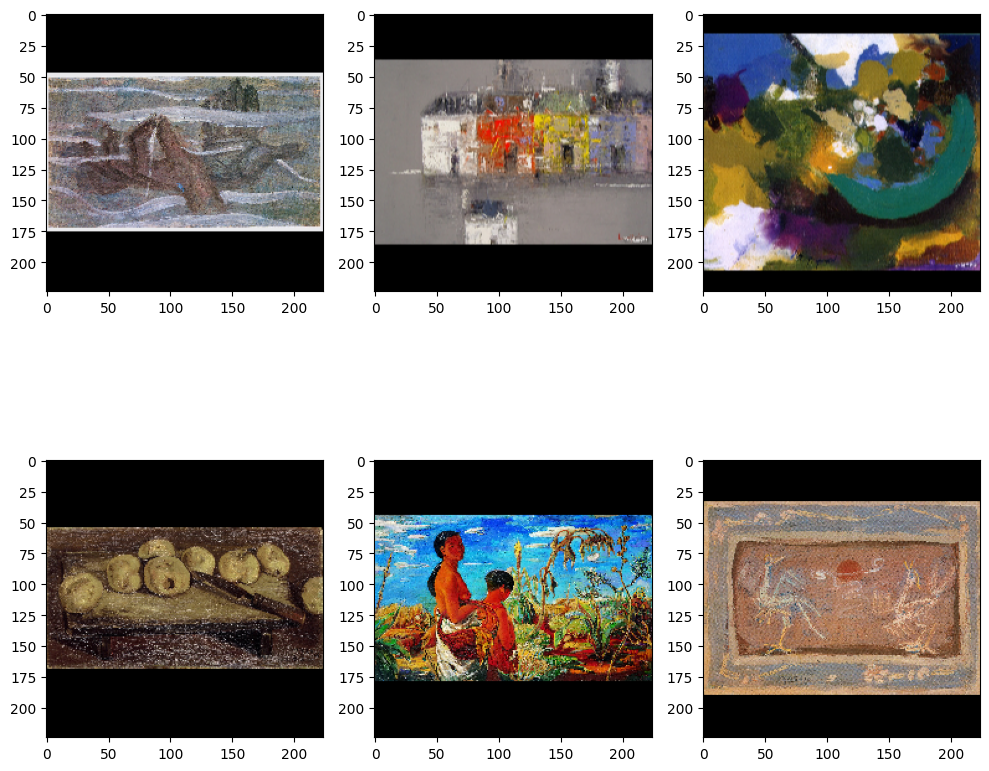

In [ ]:
recommend(256)

Similar Images:


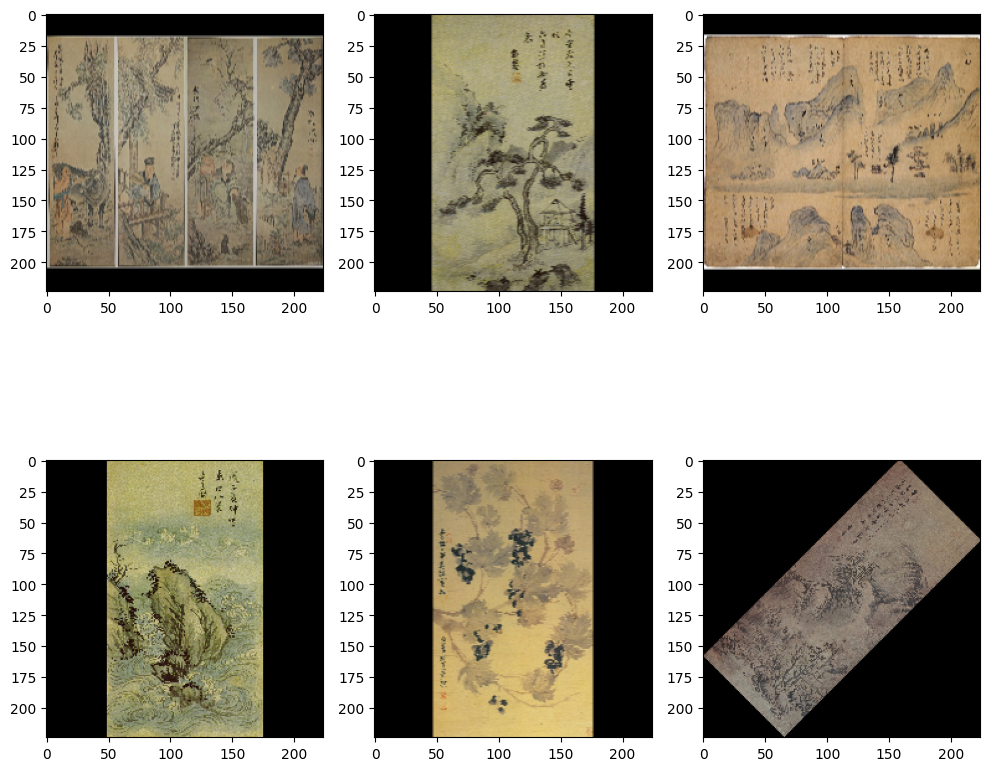

In [ ]:
recommend(3)